## Loading the libraries

In [7]:
import mapclassify as mp
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Loading the data

The data for the geopandas processing example will be the route network and tract data. The data for the geovisualization example will be the texas boundary file.

In [8]:
tracts = gpd.read_file('data/clinics.shp')
routes = gpd.read_file('data/Truck_Route_Network.shp')
texas = gpd.read_file('data/texas.shp')

## Geoprocessing example

For the geoprocessing example, we will do the route clipping example from the pysal workshop geopandas_gp tutorial. This will involve reading in both the routes file and polygon file, checking the attributes of both datasets, disolving the boundaries of the polygons, and intersecting the 
routes and the dissolved polygon.

### Examing the route data

To begin, we plot the routes with `plot`

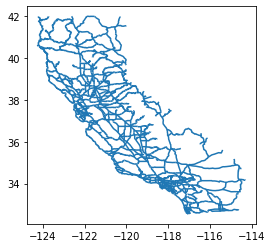

In [10]:
routes.plot()

With `.dtypes` we can see the different variables and their data types. With `.head` we can see the first few observations of each variable. We use `.head` on the geometry column to see the geometry types 

In [11]:
routes.dtypes

SHAPE_Leng     float64
Beg_Latitu     float64
Beg_Longit     float64
End_Latitu     float64
End_Longit     float64
Route            int64
District         int64
County          object
Beg_PMPre       object
Beg_PM         float64
EQ              object
End_PMPre       object
End_PM         float64
Segment_Mi     float64
Sp_Restr        object
Rstr_Type        int64
Segmt_Type      object
KPRA            object
Beg_Locati      object
End_Locati      object
Comment         object
seg_length       int64
geometry      geometry
dtype: object

In [12]:
routes.head()

,SHAPE_Leng,Beg_Latitu,Beg_Longit,End_Latitu,End_Longit,Route,District,County,Beg_PMPre,Beg_PM,...,Segment_Mi,Sp_Restr,Rstr_Type,Segmt_Type,KPRA,Beg_Locati,End_Locati,Comment,seg_length,geometry
0,0.426140,33.467051,-117.669910,33.750992,-118.105912,1,12,ORA,R,0.129,...,33.740,None,0,TA,None,Jct 5,Orange / Los Angeles County Line,None,47438,"MULTILINESTRING ((-117.67002 33.46688, -117.67..."
1,0.420058,33.750992,-118.105912,33.931485,-118.395991,1,7,LA,None,0.000,...,25.858,None,0,TA,None,Pacific Coast Highway,Jct 105 (Imperial Hwy),None,46761,"LINESTRING (-118.10598 33.75104, -118.10618 33..."
2,0.012263,33.931485,-118.395991,33.944521,-118.396115,1,7,LA,None,25.924,...,0.946,R,5,TA,None,Jct 105 (Imperial Hwy),W. Century Blvd.,"Sign on SB 1 at Century Blvd. says ""NO Tank Ve...",1365,"LINESTRING (-118.39611 33.93223, -118.39614 33..."
3,0.101036,33.944521,-118.396115,34.002761,-118.470584,1,7,LA,None,26.897,...,6.439,None,0,TA,None,W. Century Blvd.,Begin Route Break: Lincoln Blvd. near Ozone Ave.,Rte 1 north of Ozone Ave relinquished to City ...,11247,"LINESTRING (-118.39620 33.94487, -118.39619 33..."
4,0.000513,34.002761,-118.470584,34.014809,-118.486011,1,7,LA,None,34.526,...,0.050,None,0,CL,40,End Route Break: Lincoln Blvd. near Olympic Av...,Lincoln Blvd. at I-10 overcrossing in Santa Mo...,None,57,"LINESTRING (-118.48547 34.01443, -118.48547 34..."


In [13]:
routes['geometry'].head()

0    MULTILINESTRING ((-117.67002 33.46688, -117.67...
1    LINESTRING (-118.10598 33.75104, -118.10618 33...
2    LINESTRING (-118.39611 33.93223, -118.39614 33...
3    LINESTRING (-118.39620 33.94487, -118.39619 33...
4    LINESTRING (-118.48547 34.01443, -118.48547 34...
Name: geometry, dtype: geometry

It is good practice to always check the crs. We can do that here with `crs`.

In [14]:
routes.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Examing the tract data

We use the same functions to explore the tract data as the route data.

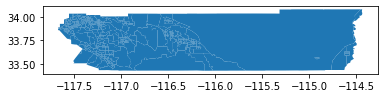

In [15]:
tracts.plot()

In [16]:
tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
tracts.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinics,geometry
0,06065042012,Census Tract 420.12,2687173.0,0.0,+33.9108776,-117.3205065,6242,420,545,620,...,1142,826,3927,2299,3.44,2.78,0.095958,0.000262,0.0,"POLYGON ((-117.30046 33.91311, -117.30068 33.9..."
1,06065041911,Census Tract 419.11,70257842.0,0.0,+33.7428832,-117.4957943,10258,840,844,806,...,2881,430,8710,1543,3.02,3.59,0.466106,0.006836,0.0,"POLYGON ((-117.51020 33.80027, -117.50851 33.8..."
2,06065041910,Census Tract 419.10,11167489.0,64225.0,+33.7892199,-117.4949771,6342,404,453,447,...,1823,350,5177,1165,2.84,3.33,0.200974,0.001093,0.0,"POLYGON ((-117.50298 33.82495, -117.50291 33.8..."
3,06065040816,Census Tract 408.16,1788821.0,0.0,+33.9024569,-117.5246107,2594,162,161,227,...,688,171,2133,451,3.10,2.64,0.082444,0.000174,0.0,"POLYGON ((-117.51512 33.90097, -117.51532 33.9..."
4,06065040815,Census Tract 408.15,1266779.0,0.0,+33.8930776,-117.5114997,3586,231,235,257,...,756,399,2462,1124,3.26,2.82,0.050637,0.000123,0.0,"POLYGON ((-117.50386 33.89736, -117.50357 33.8..."


In [18]:
tracts["geometry"].head()

0    POLYGON ((-117.30046 33.91311, -117.30068 33.9...
1    POLYGON ((-117.51020 33.80027, -117.50851 33.8...
2    POLYGON ((-117.50298 33.82495, -117.50291 33.8...
3    POLYGON ((-117.51512 33.90097, -117.51532 33.9...
4    POLYGON ((-117.50386 33.89736, -117.50357 33.8...
Name: geometry, dtype: geometry

### Intersecting the tract and route data

We can use `dissolve` to get one cohesive polygon. We set up a dummy variable so that we can use this function.

In [19]:
tracts['dummy'] = 1.0
county = tracts.dissolve(by='dummy')

We plot the resulting polygon below with `plot`

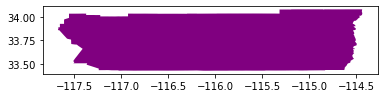

In [28]:
county.plot(color = "purple")

We assign the geometry column of **routes** to be **r**, then we use lambda to apply a function; `intersects` to each route in r

In [22]:
r = routes['geometry']

In [23]:
rc_routes = r[r.apply(lambda x: x.intersects(county.iloc[0]['geometry']))]

We use `plot` to see the result

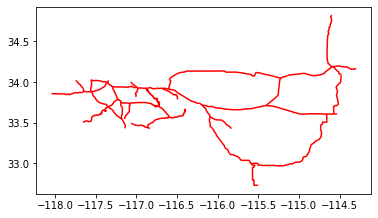

In [29]:
rc_routes.plot(edgecolor="r")

We plot both the polygon and the intersecting routes below with `plot`.

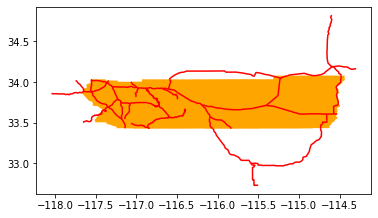

In [50]:
ax = plt.gca()
rc_routes.plot(ax=ax, edgecolor='r')
county.plot(ax=ax,color = "orange")
plt.show()

## Geovisualization Example

The geovisualization example will build various choropleth maps of the the **texas** dataset with different styling options including palettes, border colors, classification styles, and legends.

To begin we check plot **texas** and explore the data. We use `plot` to see the texas counties, `dtypes` to 
see the variables and their data type, and `head` to see the first few observations of **texas**. 

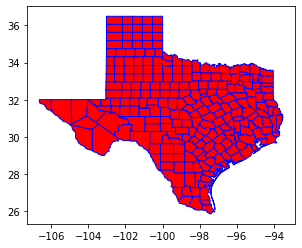

In [31]:
texas.plot(color = "red", edgecolor = "b")

In [32]:
texas.dtypes

NAME            object
STATE_NAME      object
STATE_FIPS      object
CNTY_FIPS       object
FIPS            object
                ...   
FH60           float64
FH70           float64
FH80           float64
FH90           float64
geometry      geometry
Length: 70, dtype: object

In [33]:
texas.head()

We use **pyplot** functionality to display our texas maps. We can add a number of style options
with this library. These include classification styles for the breaks with **scheme=**, the color 
palette with **cmap=**, adding a legend with **legend=**, and changing the border color with **edgecolor=**.
We set the palette to be `RdBu`, which gives red for low values and blue for high values with white in the 
middle. We set the classifcation style to be quantile.

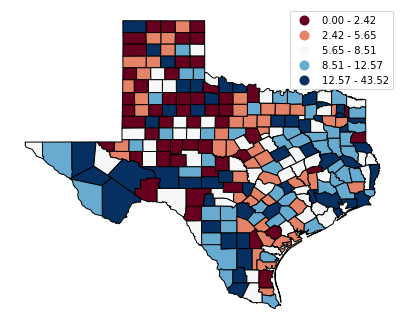

In [38]:
f, ax = plt.subplots(1, figsize=(7, 7))
texas.plot(column='HR90', scheme='QUANTILES', ax=ax,
        edgecolor='black', legend=True,cmap="RdBu")
ax.set_axis_off()
plt.show()

We follow a similar structure in our code here, but change out some of the 
arguments to look at a different variable with different visual aesthetics. We
add `k=7` to get 7 color categories for the variable. We also change the classification
style to `equal_interval`. We change the line width of the borders with `linewidth = `. Lastly
we just swap the colors for the polygons with `cmap="Blues`.

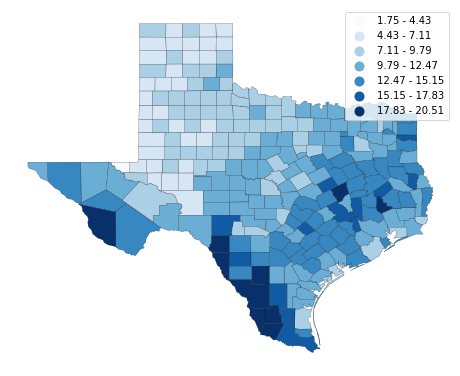

In [42]:
f, ax = plt.subplots(1, figsize=(8, 8))
texas.plot(column='FH60', scheme='equal_interval', \
        k=7, cmap='Blues', linewidth=0.2, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.show()

Here we make a plot of **HR80**. We use the equal interval classification style. We use 
orange for the choropleth palette. We keep a lot of the same formatting as the map above.

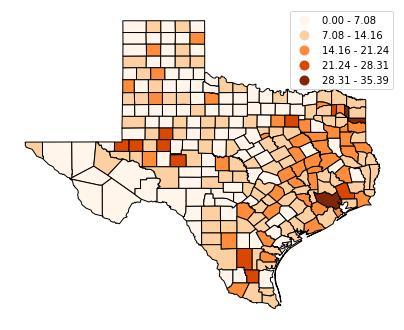

In [49]:
f, ax = plt.subplots(1, figsize=(7, 7))
texas.plot(column='HR80', scheme='equal_interval', ax=ax,
        edgecolor='black', legend=True,cmap="Oranges")
ax.set_axis_off()
plt.show()